#Principal Component Analysis

Principal Component Analysis(PCA) is one of the most popular linear dimension reduction. Sometimes, it is used alone and sometimes as a starting solution for other dimension reduction methods. PCA is a projection based method which transforms the data by projecting it onto a set of orthogonal axes.
<p>Let's develop an intuitive understanding of PCA. Suppose, you wish to differentiate between different food items based on their nutritional content. Which variable will be a good choice to differentiate food items? If you choose a variable which varies a lot from one food item to another, you will be able to isolate them properly. Your job will be much harder if the chosen variable is almost same in food items. What if data doesn't have a variable which segregates food items properly? We can create an artificial variable through a linear combination of original variables like
 <b>artVar1 = 2 X orgVar1 - 3 X orgVar2 + 5 X orgVar3.</b> 
 This is what essentially PCA does, it finds best linear combinations of the original variables so that the variance or spread along the new variable is maximum.</p>
 


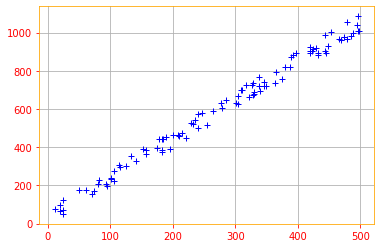

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

x_data = tf.multiply(5, tf.random.uniform([100], minval=0, maxval=100, dtype = tf.float32, seed = 0))
y_data = tf.multiply(2, x_data) + 1 + tf.random.uniform([100], minval=0, maxval=100, dtype = tf.float32, seed = 0)

X = tf.stack([x_data, y_data], axis=1)

plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'red', 'ytick.color':'red'})
plt.plot(X[:,0], X[:,1], '+', color='b')
plt.grid()

In [7]:
X.shape

TensorShape([100, 2])

In [9]:
X[:10]

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 50.43131 , 173.92715 ],
       [485.08337 , 980.5061  ],
       [424.38208 , 916.5281  ],
       [ 24.140656, 121.70948 ],
       [ 24.261534,  50.477875],
       [388.73734 , 869.5469  ],
       [422.234   , 905.7481  ],
       [208.53746 , 462.0018  ],
       [254.97919 , 517.7514  ],
       [327.60126 , 671.89795 ]], dtype=float32)>

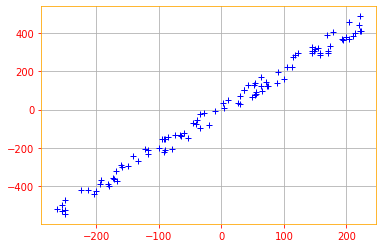

In [3]:
def normalize(data):
    # creates a copy of data
    X = tf.identity(data)
    # calculates the mean
    X -=tf.reduce_mean(data, axis=0)
    return X

normalized_data = normalize(X)
plt.plot(normalized_data[:,0], normalized_data[:,1], '+', color='b')
plt.grid()

In [5]:
# Finding the Eigne Values and Vectors for the data
eigen_values, eigen_vectors = tf.linalg.eigh(tf.tensordot(tf.transpose(normalized_data), normalized_data, axes=1))

print("Eigen Vectors: \n{} \nEigen Values: \n{}".format(eigen_vectors, eigen_values))


Eigen Vectors: 
[[-0.89603883 -0.44397566]
 [ 0.44397566 -0.89603883]] 
Eigen Values: 
[   16621.441 10222313.   ]


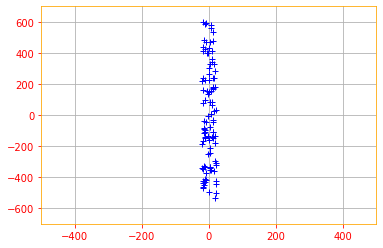

In [6]:
X_new = tf.tensordot(tf.transpose(eigen_vectors), tf.transpose(normalized_data), axes=1)

plt.plot(X_new[0, :], X_new[1, :], '+', color='b')
plt.xlim(-500, 500)
plt.ylim(-700, 700)
plt.grid()